In [34]:
import pandas as pd
import matplotlib.pyplot as plt

file_path319 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris319.pkl'
file_path320 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris320.pkl'
file_path321 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris321.pkl'
file_path332 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris332.pkl'

df319 = pd.read_pickle(file_path319)
df320 = pd.read_pickle(file_path320)
df321 = pd.read_pickle(file_path321)
df332 = pd.read_pickle(file_path332)

In [35]:
df319[df319['baroaltitude'] == 0]

,time,timestep,maxtimestep,icao24,callsign,baroaltitude,lat,lon,velocity,vertratecorr,segment,modeltype,operator,fromICAO,toICAO,distance_from_dep,trip_distance,temp,tas


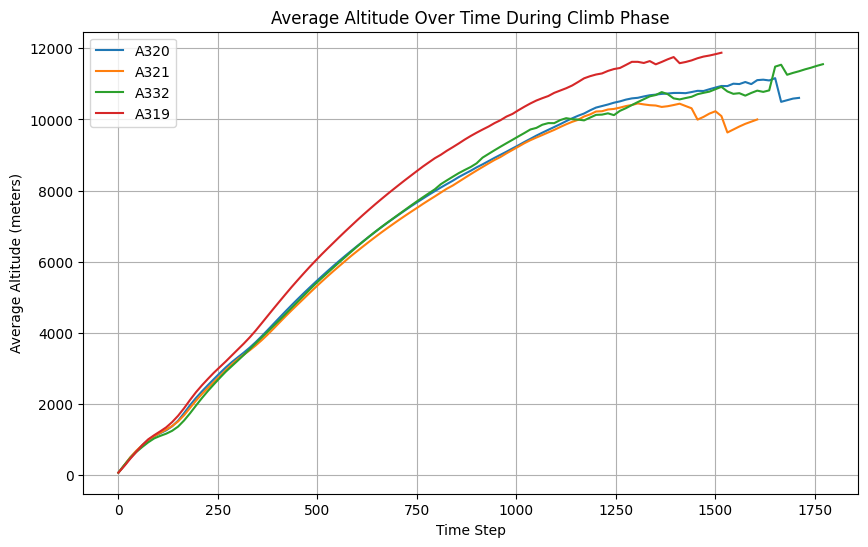

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Path
base_path = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights'

# Filenames of the files
filenames = ['paris320.pkl', 'paris321.pkl', 'paris332.pkl', 'paris319.pkl']
aircraft_data = {}
airplane_models = ['A320', 'A321', 'A332', 'A319']

# Load data
for file in filenames:
    path = f"{base_path}\\{file}"
    aircraft_data[file] = pd.read_pickle(path)

# Prepare the plot
plt.figure(figsize=(10, 6))

# Process and plot data for each aircraft
for file, model in zip(filenames, airplane_models):
    df = aircraft_data[file]
    average_altitude = df.groupby('timestep')['baroaltitude'].mean()    # Calculate average barometric altitude over time
    
    # Plotting
    plt.plot(average_altitude, label=model.replace('.pkl', ''))

plt.title('Average Altitude Over Time During Climb Phase')
plt.xlabel('Time Step')
plt.ylabel('Average Altitude (meters)')
plt.legend()
plt.grid(True)
plt.show()


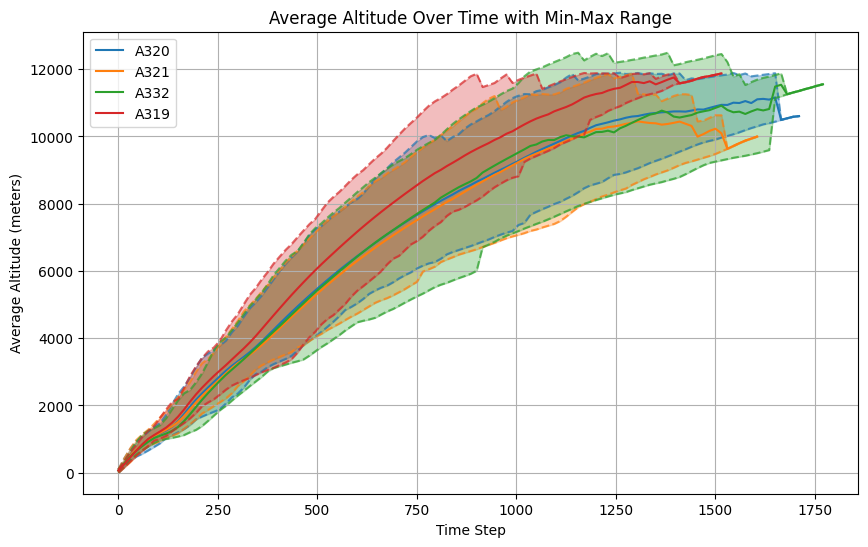

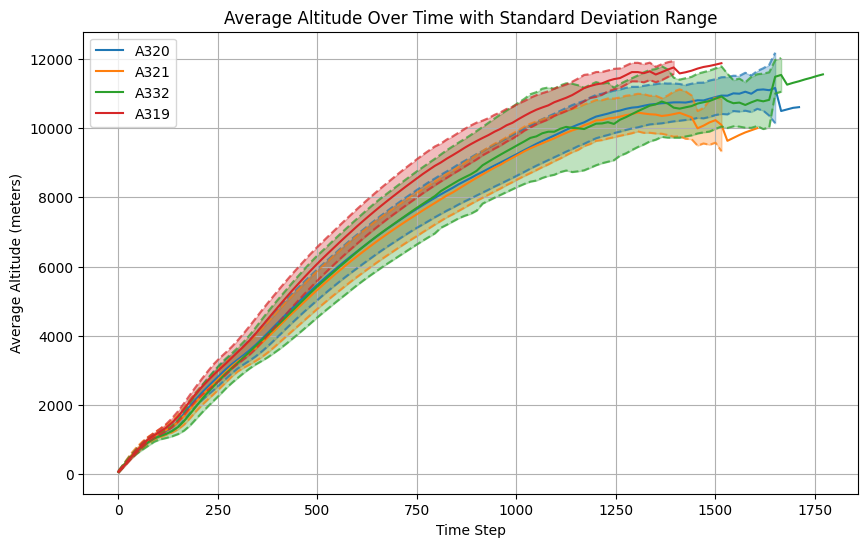

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path
base_path = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights'

# Filenames of the files
filenames = ['paris320.pkl', 'paris321.pkl', 'paris332.pkl', 'paris319.pkl']
aircraft_data = {}
airplane_models = ['A320', 'A321', 'A332', 'A319']

# Load data
for file in filenames:
    path = f"{base_path}\\{file}"
    aircraft_data[file] = pd.read_pickle(path)

# 1st Plot: Mean with Min-Max Corridor and Dotted Lines
plt.figure(figsize=(10, 6))
for file, model in zip(filenames, airplane_models):
    df = aircraft_data[file]
    
    # Group by timestep and calculate statistics
    grouped = df.groupby('timestep')['baroaltitude']
    average_altitude = grouped.mean()  # Mean altitude
    min_altitude = grouped.min()       # Minimum altitude
    max_altitude = grouped.max()       # Maximum altitude
    
    # Plot mean line and get the line color
    line, = plt.plot(average_altitude, label=model.replace('.pkl', ''))  # Mean line
    color = line.get_color()  # Get the color of the mean line
    
    # Fill the corridor for Min-Max range
    plt.fill_between(average_altitude.index, 
                     min_altitude, 
                     max_altitude, 
                     alpha=0.3, color=color)  # Min-max range with the same color
    
    # Plot dotted lines at Min-Max boundaries with the same color
    plt.plot(average_altitude.index, 
             min_altitude, 
             linestyle='--', color=color, alpha=0.7)  # Min line
             
    plt.plot(average_altitude.index, 
             max_altitude, 
             linestyle='--', color=color, alpha=0.7)  # Max line

# Add labels and details
plt.title('Average Altitude Over Time with Min-Max Range')
plt.xlabel('Time Step')
plt.ylabel('Average Altitude (meters)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# 2nd Plot: Mean with Standard Deviation Corridor and Dotted Lines
plt.figure(figsize=(10, 6))
for file, model in zip(filenames, airplane_models):
    df = aircraft_data[file]
    
    # Group by timestep and calculate statistics
    grouped = df.groupby('timestep')['baroaltitude']
    average_altitude = grouped.mean()  # Mean altitude
    std_altitude = grouped.std()       # Standard deviation of altitude
    
    # Plot mean line and get the line color
    line, = plt.plot(average_altitude, label=model.replace('.pkl', ''))  # Mean line
    color = line.get_color()  # Get the color of the mean line
    
    # Fill the corridor for mean ± standard deviation
    plt.fill_between(average_altitude.index, 
                     average_altitude - std_altitude, 
                     average_altitude + std_altitude, 
                     alpha=0.3, color=color)  # Standard deviation range with the same color
    
    # Plot dotted lines at ± standard deviation with the same color
    plt.plot(average_altitude.index, 
             average_altitude - std_altitude, 
             linestyle='--', color=color, alpha=0.7)  # -1 SD line
             
    plt.plot(average_altitude.index, 
             average_altitude + std_altitude, 
             linestyle='--', color=color, alpha=0.7)  # +1 SD line

# Add labels and details
plt.title('Average Altitude Over Time with Standard Deviation Range')
plt.xlabel('Time Step')
plt.ylabel('Average Altitude (meters)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


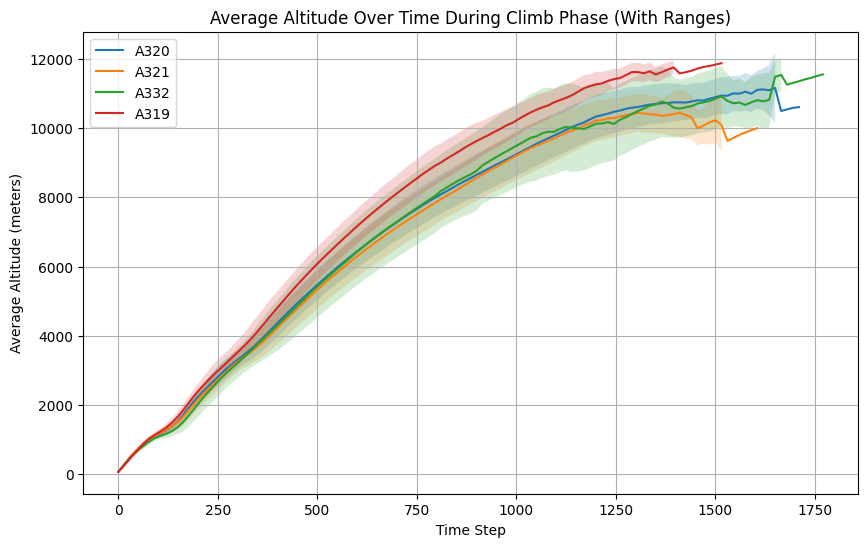

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path
base_path = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights'

# Filenames of the files
filenames = ['paris320.pkl', 'paris321.pkl', 'paris332.pkl', 'paris319.pkl']
aircraft_data = {}
airplane_models = ['A320', 'A321', 'A332', 'A319']

# Load data
for file in filenames:
    path = f"{base_path}\\{file}"
    aircraft_data[file] = pd.read_pickle(path)

# Prepare the plot
plt.figure(figsize=(10, 6))

# Process and plot data for each aircraft
for file, model in zip(filenames, airplane_models):
    df = aircraft_data[file]
    
    # Group by timestep and calculate statistics
    grouped = df.groupby('timestep')['baroaltitude']
    average_altitude = grouped.mean()  # Mean altitude
    std_altitude = grouped.std()       # Standard deviation of altitude
    min_altitude = grouped.min()       # Minimum altitude
    max_altitude = grouped.max()       # Maximum altitude
    n = grouped.count()                # Number of observations per timestep
    sem = std_altitude / np.sqrt(n)    # Standard Error of the Mean (SEM)
    ci95 = 1.96 * sem                  # 95% Confidence Interval
    
    # Plot mean with corridors
    plt.plot(average_altitude, label=model.replace('.pkl', ''))  # Mean line
    
    # Fill the corridors for standard deviation, min-max, and 95% CI
    plt.fill_between(average_altitude.index, 
                      average_altitude - std_altitude, 
                      average_altitude + std_altitude, 
                      alpha=0.2)  # Standard deviation range

    # plt.fill_between(average_altitude.index, 
    #                   min_altitude, 
    #                   max_altitude, 
    #                   alpha=0.1)  # Min-max range

    # plt.fill_between(average_altitude.index, 
    #                  average_altitude - ci95, 
    #                  average_altitude + ci95, 
    #                  alpha=0.3)  # 95% CI range

# Add labels and other plot details
plt.title('Average Altitude Over Time During Climb Phase (With Ranges)')
plt.xlabel('Time Step')
plt.ylabel('Average Altitude (meters)')
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot
plt.show()